In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')

##### The tech stocks we'll use for this analysis

In [2]:
path='/Users/divya/Desktop/Online Courses/Data Analysis Projects/Stock Market /individual_stocks_5yr'
company_list = ['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']

#blank dataframe
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_df])
    
all_data.shape

(4752, 7)

In [3]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [4]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [5]:
# changing date column to datetime datatype as it of object type
all_data['date']=pd.to_datetime(all_data['date'])
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

##### Analysing closing price of all the stocks

1 AAPL
2 GOOG
3 MSFT
4 AMZN


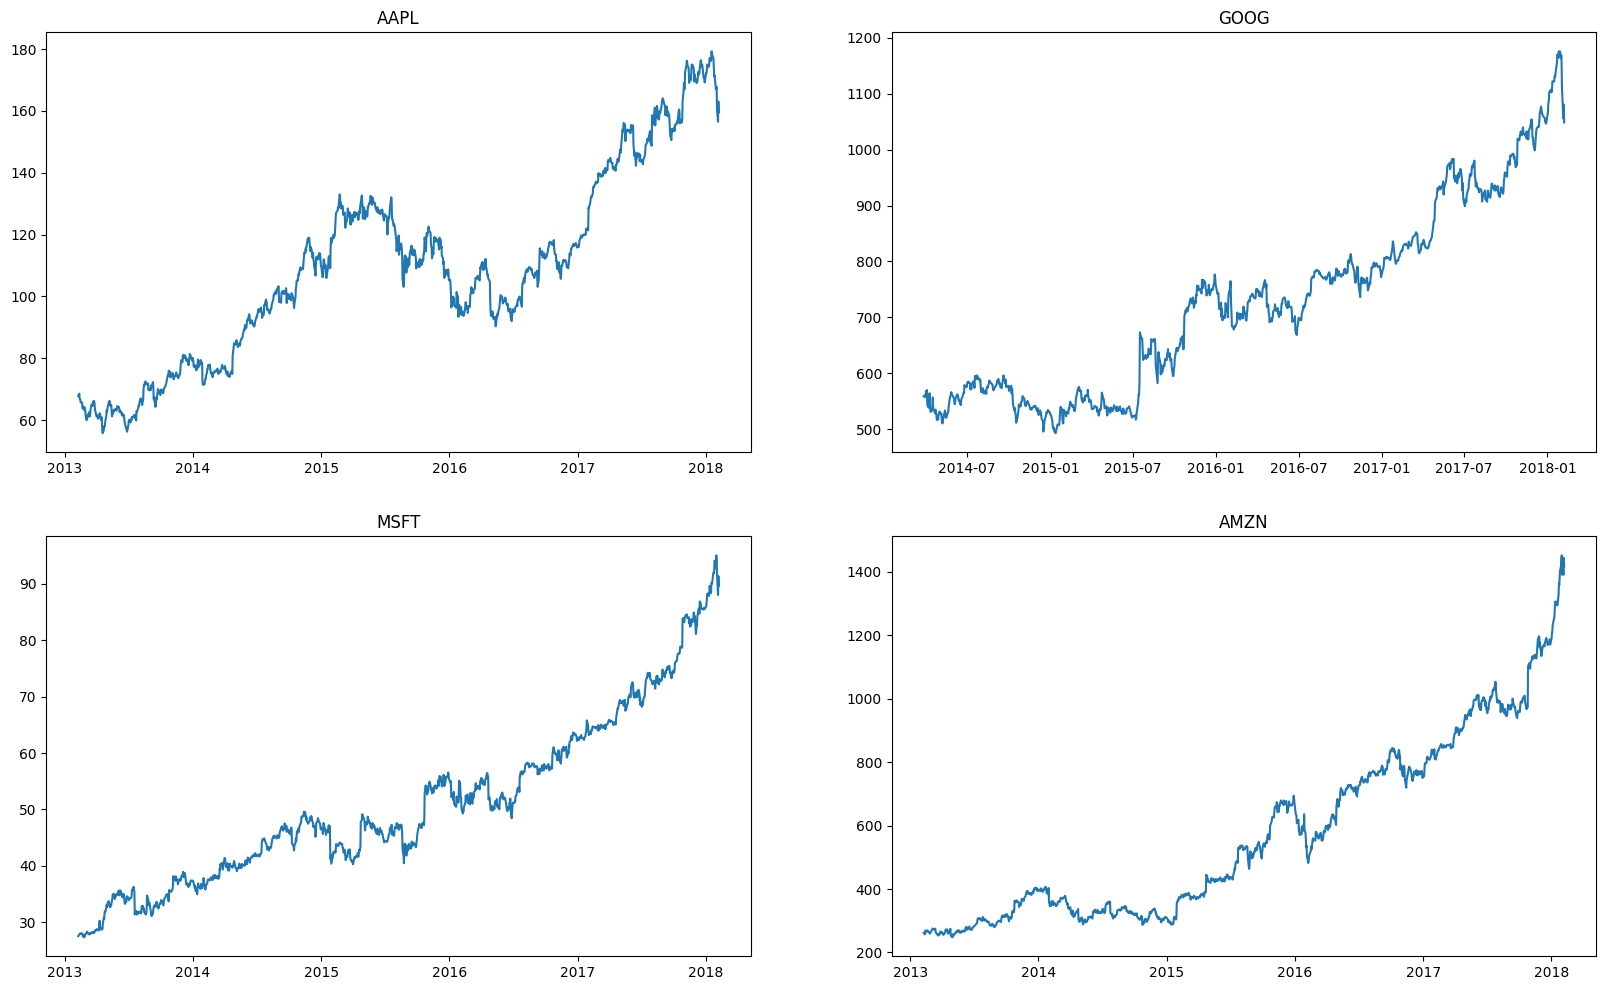

In [6]:
tech_list = all_data['Name'].unique()

plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    print(i, company)
    plt.subplot(2, 2, i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title(company)

    

In [7]:
divya =all_data[all_data['Name']=='MSFT']
divya.head(100)

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.7100,27.3100,27.550,33318306,MSFT
1,2013-02-11,27.65,27.9200,27.5000,27.860,32247549,MSFT
2,2013-02-12,27.88,28.0000,27.7500,27.880,35990829,MSFT
3,2013-02-13,27.93,28.1100,27.8800,28.030,41715530,MSFT
4,2013-02-14,27.92,28.0600,27.8700,28.040,32663174,MSFT
...,...,...,...,...,...,...,...
95,2013-06-26,34.12,34.4800,33.8875,34.350,48665592,MSFT
96,2013-06-27,34.52,34.7800,34.5000,34.620,28993042,MSFT
97,2013-06-28,34.38,34.7900,34.3400,34.545,65545445,MSFT
98,2013-07-01,34.75,34.9900,34.3300,34.360,31054868,MSFT


#### Calculating moving average for closing stock prices

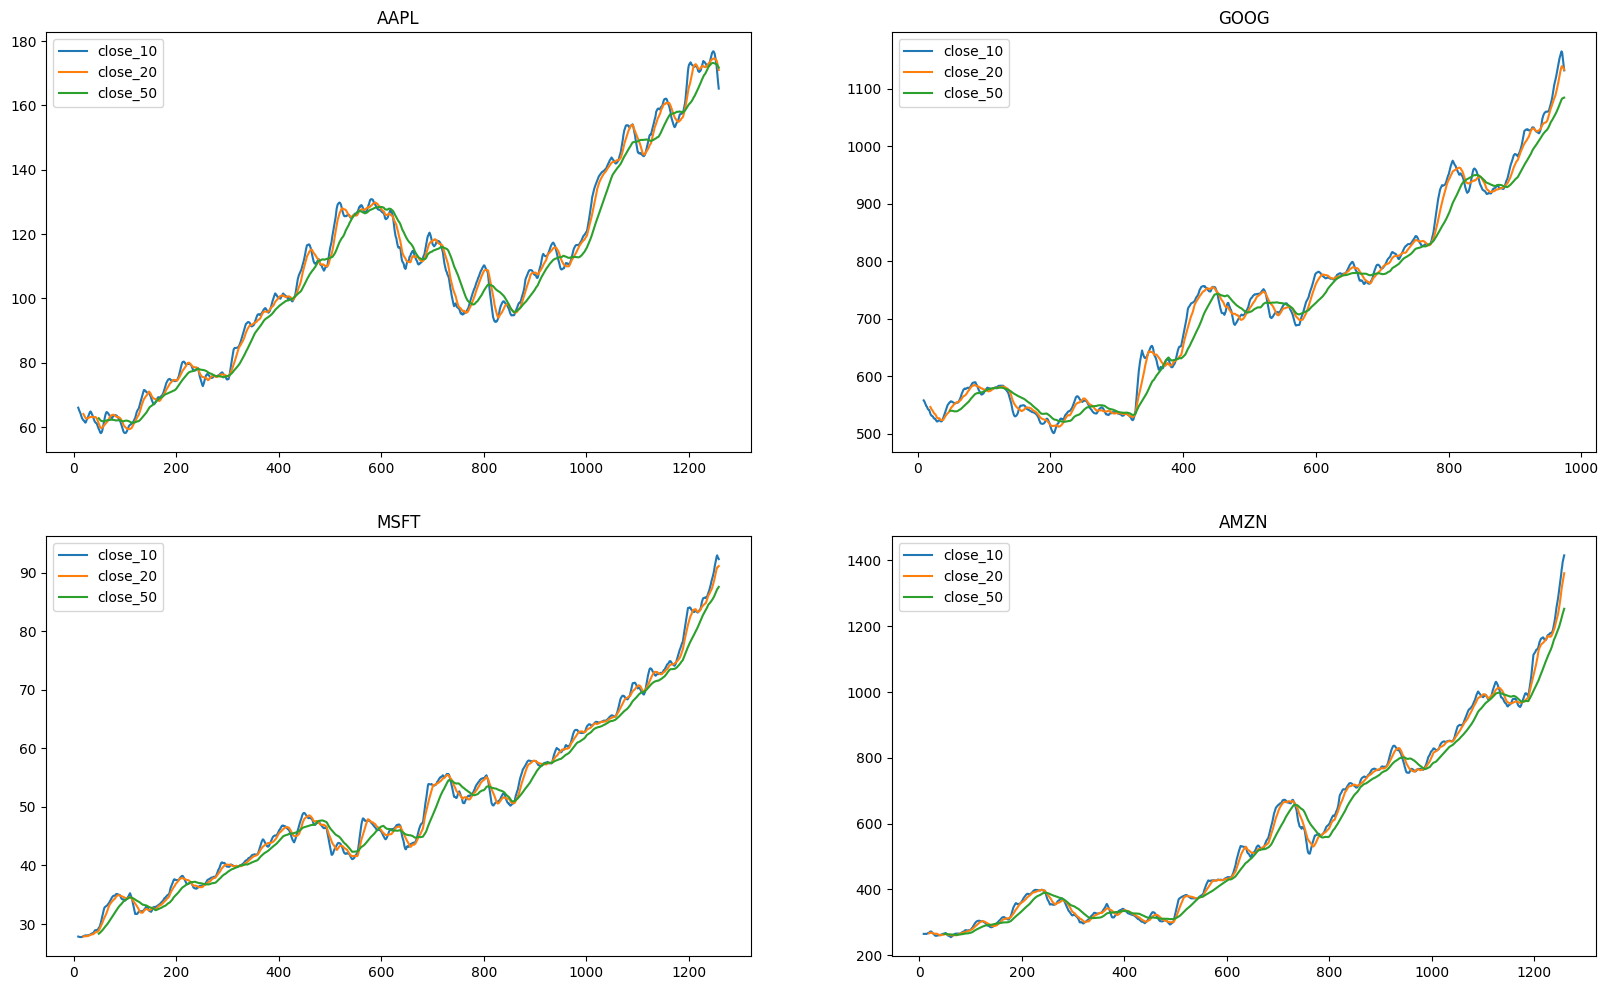

In [8]:
new_data = all_data.copy()

plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=new_data[new_data['Name']==company]
    for window_size in [10,20,50]:
        df['close_'+str(window_size)] = df['close'].rolling(window_size).mean()
    df[['close_10','close_20','close_50']].plot(ax=plt.gca())
    plt.title(company)

##### let's analyse the total volume of stock being traded each day

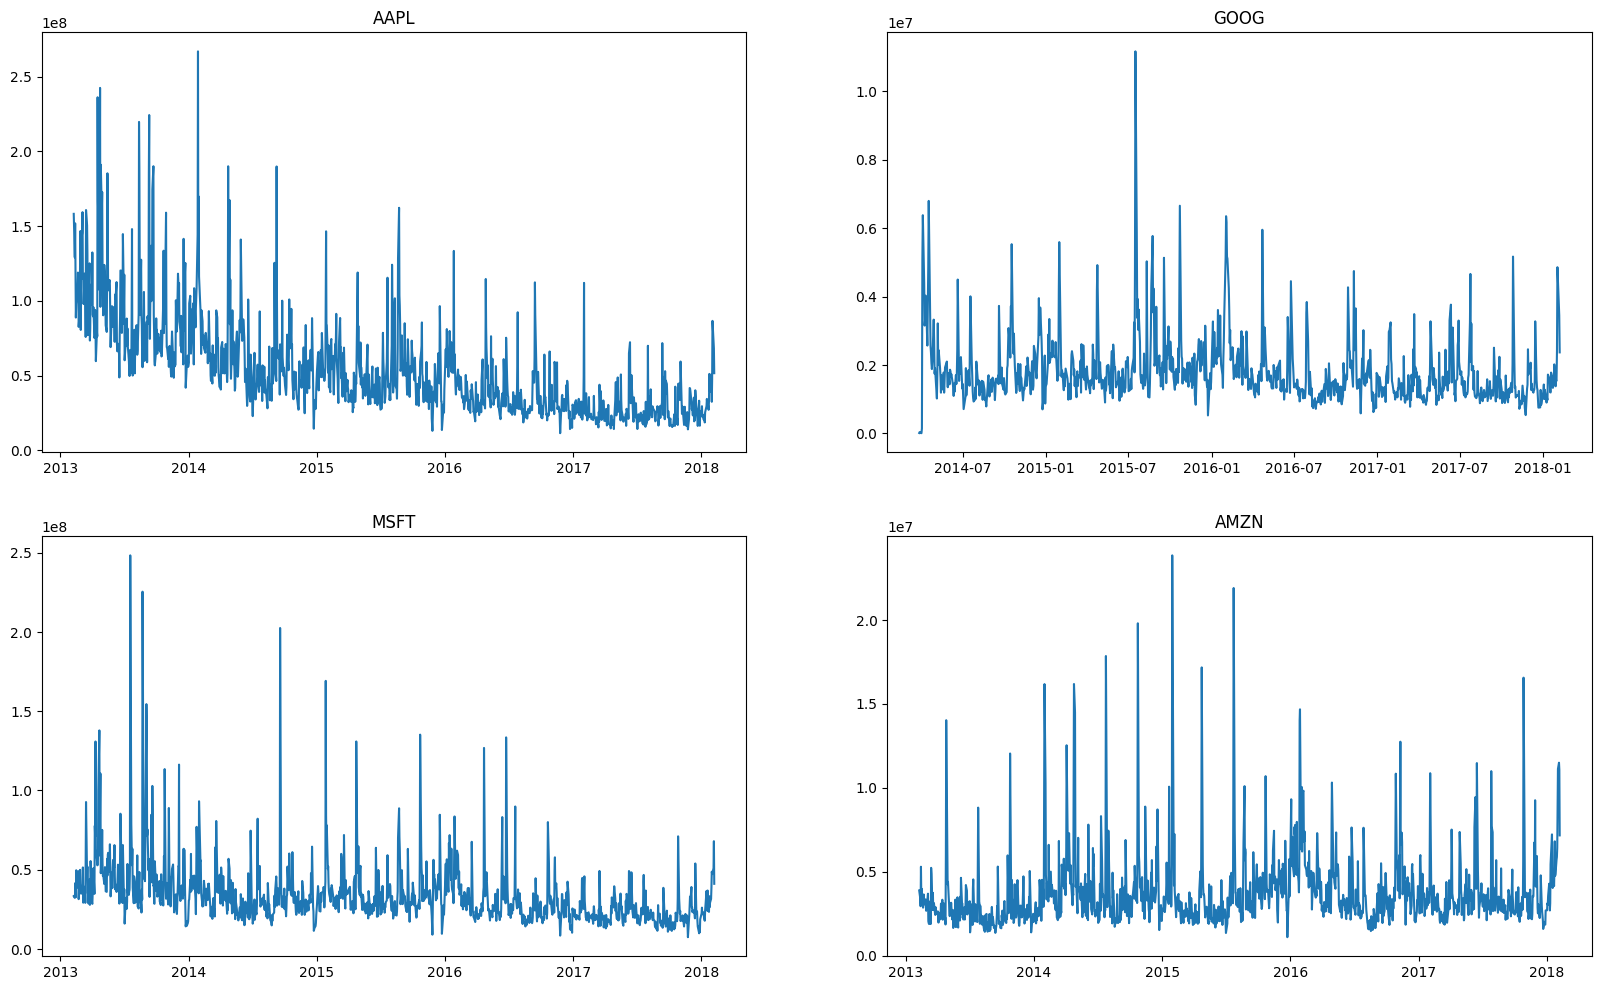

In [9]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['volume'])
    plt.title(company)


##### Analyzing volumne of stocks sold for each company

In [11]:

for company in (tech_list):
    df=all_data[all_data['Name']==company]
    fig = px.line(df, x="date", y="volume", title=company)
    fig.show()

##### Analyzing Daily highest stock price for each firm

In [12]:
for company in (tech_list):
    df=all_data[all_data['Name']==company]
    fig = px.line(df, x="date", y="high", title=company)
    fig.show()

##### Daily Stock Return Formula
1. Intraday return - Subtract opening rate from closing rate to determine  the intraday return for each stock. We divide this by opening price to get percentage of return.


In [13]:
apple =pd.read_csv('/Users/divya/Desktop/Online Courses/Data Analysis Projects/Stock Market /individual_stocks_5yr/AAPL_data.csv')
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [14]:
apple['Intraday return(%)']=((apple['close']-apple['open'])/apple['open'])*100
apple.head()

,date,open,high,low,close,volume,Name,Intraday return(%)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.206751
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.719832
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.421264
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.042850
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.445600


In [15]:
# using plotly to visualise data
import plotly.express as px
fig = px.line(apple, x="date", y="Intraday return(%)", title='')
fig.show()

#### Lets say between some interval

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '2016-03-17'),
  Text(0.0, 0, '2016-01-04'),
  Text(10.0, 0, '2016-01-19'),
  Text(20.0, 0, '2016-02-02'),
  Text(30.0, 0, '2016-02-17'),
  Text(40.0, 0, '2016-03-02'),
  Text(50.0, 0, '2016-03-16'),
  Text(60.0, 0, '2016-03-31'),
  Text(70.0, 0, '')])

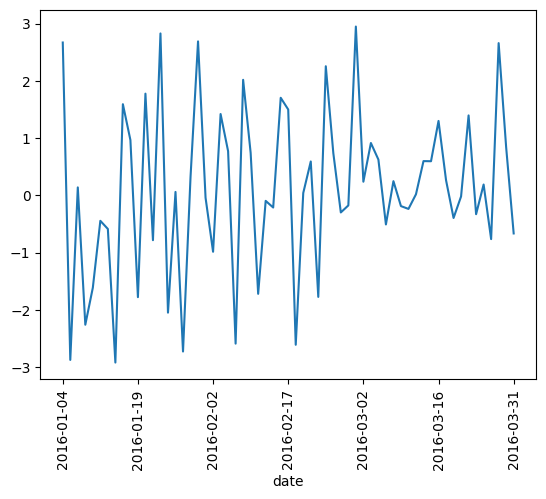

In [17]:
apple.set_index('date')['2016-01-01':'2016-03-31']['Intraday return(%)'].plot()
plt.xticks(rotation='vertical')

2. Daily return - Finding the percentage change of closing price from previous day's closing price. 

In [18]:
# considering on some says opening stock price is not same as closing price of previous day 

apple['Daily return (%)'] = apple['close'].pct_change() * 100
apple.head()

,date,open,high,low,close,volume,Name,Intraday return(%),Daily return (%)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.206751,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.719832,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.421264,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.042850,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.445600,-0.089934


In [19]:
px.line(apple , x="date" , y="Daily return (%)") ## Plotting Line-plot of "date" vs "Daily return(in %)"..


## Resampling the data 

#### 1. Analyse monthly mean of closing price

In [20]:
df2=apple.copy()
df2['date']=pd.to_datetime(df2['date'])
df2.set_index('date',inplace=True)
df2.head()


,open,high,low,close,volume,Name,Intraday return(%),Daily return (%)
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.206751,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.719832,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.421264,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.042850,-0.190297
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.445600,-0.089934


In [21]:
df2['close'].resample('M').mean().head()

date
2013-02-28    65.306264
2013-03-31    63.120110
2013-04-30    59.966432
2013-05-31    63.778927
2013-06-30    60.791120
Freq: M, Name: close, dtype: float64

<Axes: xlabel='date'>

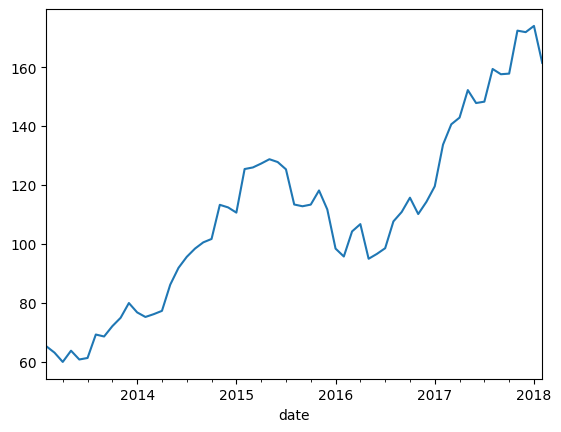

In [22]:
df2['close'].resample('M').mean().plot()    

#### 2. Analyse mean of closing price yearly

In [23]:
df2['close'].resample('Y').mean().head()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
Freq: A-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

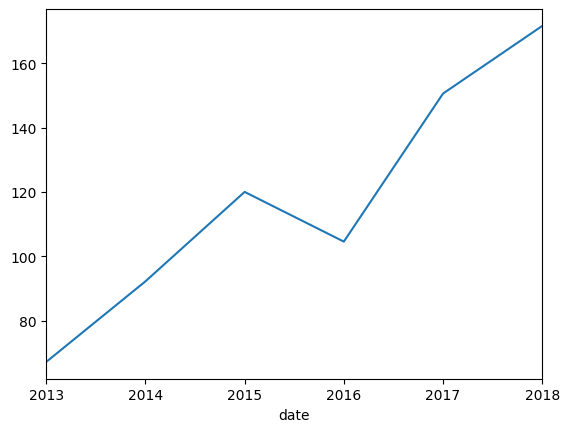

In [24]:
df2['close'].resample('Y').mean().plot()

#### 3. Analyse mean of closing price quaterly

In [25]:
df2['close'].resample('Q').mean()

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

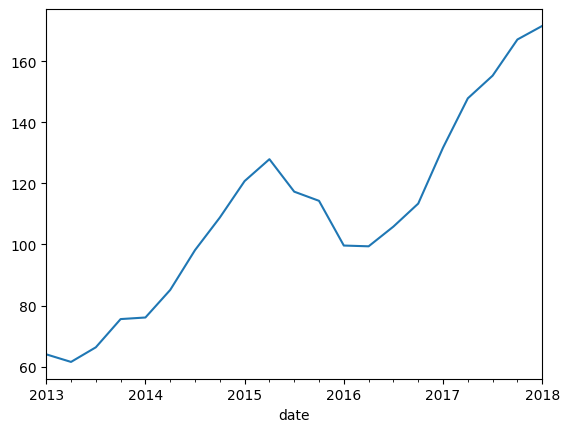

In [26]:
df2['close'].resample('Q').mean().plot()

## Checking if the Stock prices of these tech companies(Amazon,Apple,Google,Microsoft) are correlated

##### reading data of tech companies

In [27]:
aapl=pd.read_csv('/Users/divya/Desktop/Online Courses/Data Analysis Projects/Stock Market /individual_stocks_5yr/AAPL_data.csv')
goog=pd.read_csv('/Users/divya/Desktop/Online Courses/Data Analysis Projects/Stock Market /individual_stocks_5yr/GOOG_data.csv')
amzn=pd.read_csv('/Users/divya/Desktop/Online Courses/Data Analysis Projects/Stock Market /individual_stocks_5yr/AMZN_data.csv')
msft=pd.read_csv('/Users/divya/Desktop/Online Courses/Data Analysis Projects/Stock Market /individual_stocks_5yr/MSFT_data.csv')


In [28]:
### create a blank dataframe and storing just the closing stock prices in it
closing_price=pd.DataFrame()
closing_price['aapl_close']=aapl['close']
closing_price['goog_close']=goog['close']
closing_price['amzn_close']=amzn['close']
closing_price['msft_close']=msft['close']

closing_price.head()

,aapl_close,goog_close,amzn_close,msft_close
0,67.8542,558.46,261.95,27.55
1,68.5614,559.99,257.21,27.86
2,66.8428,556.97,258.70,27.88
3,66.7156,567.16,269.47,28.03
4,66.6556,567.00,269.24,28.04


#### Multi-variate Analysis

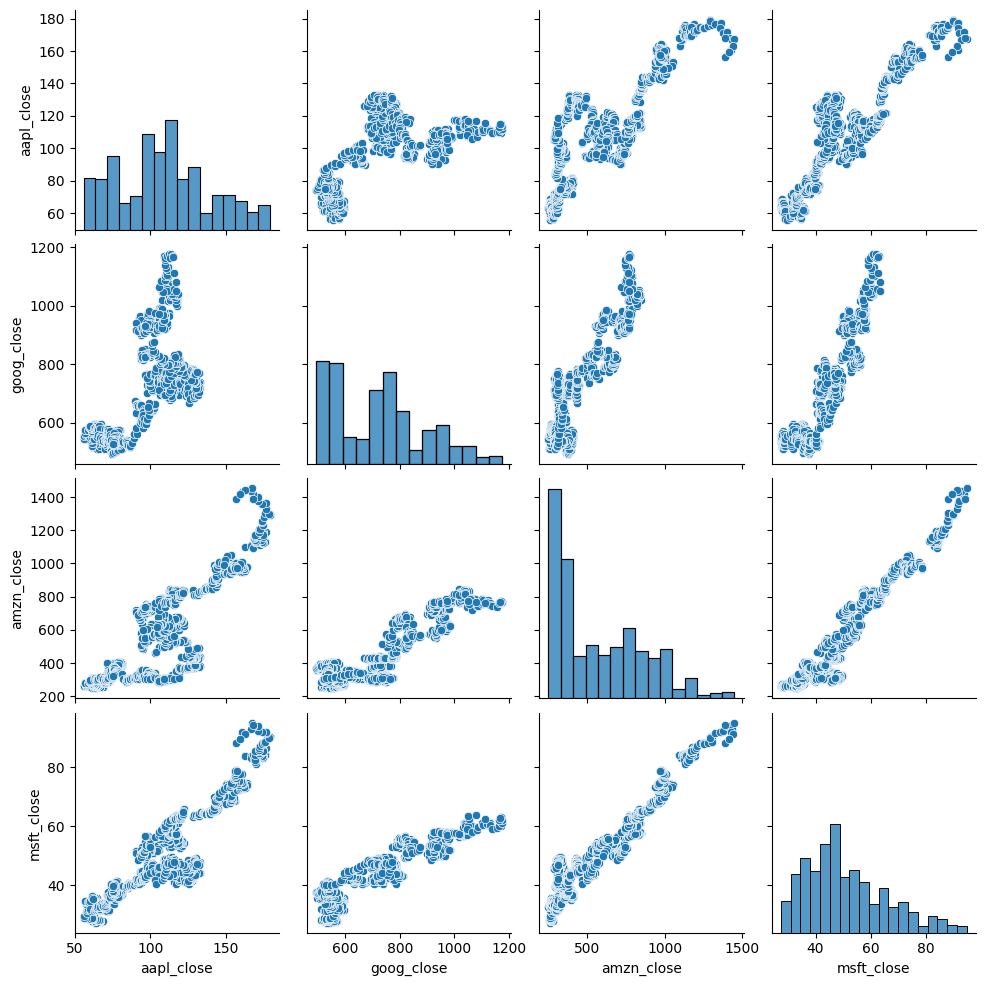

In [29]:
sns.pairplot(data=closing_price)

##### co-relation plot for stock prices 

<Axes: >

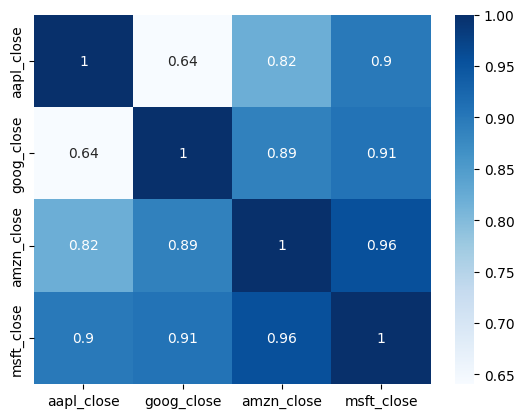

In [30]:
sns.heatmap(closing_price.corr(), annot=True,cmap='Blues')

##### Analyse Daily return of each stock & how they are co-related

In [31]:
ID_Return=pd.DataFrame()
ID_Return['appl_change']=((aapl['close']-aapl['open'])/aapl['open'])*100
ID_Return['goog_change']=((goog['close']-goog['open'])/goog['open'])*100
ID_Return['amzn_change']=((amzn['close']-amzn['open'])/amzn['open'])*100
ID_Return['msft_change']=((msft['close']-msft['open'])/msft['open'])*100

ID_Return.head()

,appl_change,goog_change,amzn_change,msft_change
0,0.206751,-1.679577,0.210406,0.731261
1,0.719832,-0.215609,-2.275836,0.759494
2,-2.421264,-1.749899,-0.189051,0.000000
3,-0.042850,1.512413,3.035981,0.358038
4,0.445600,0.335158,0.699405,0.429799


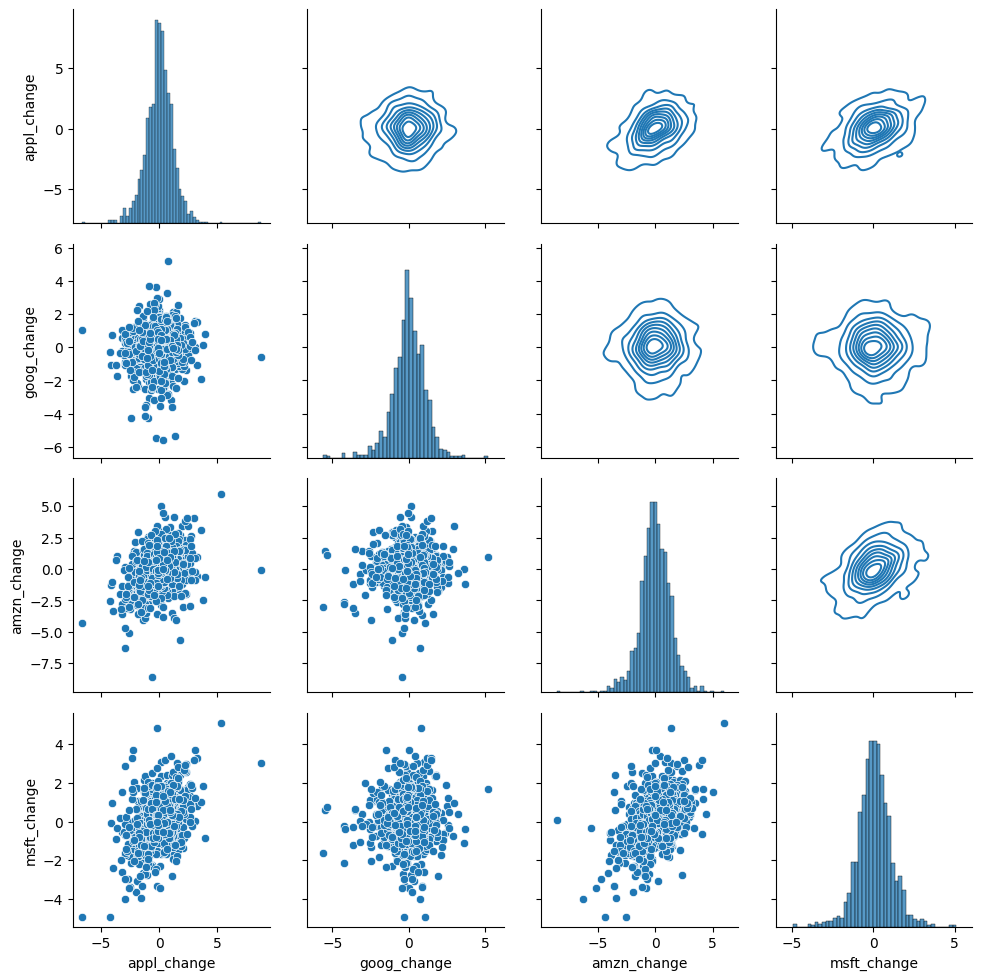

In [32]:
grid = sns.PairGrid(data=ID_Return)
grid.map_diag(sns.histplot)
grid.map_lower(sns.scatterplot)
grid.map_upper(sns.kdeplot)

##### Correlation plot for daily returns

<Axes: >

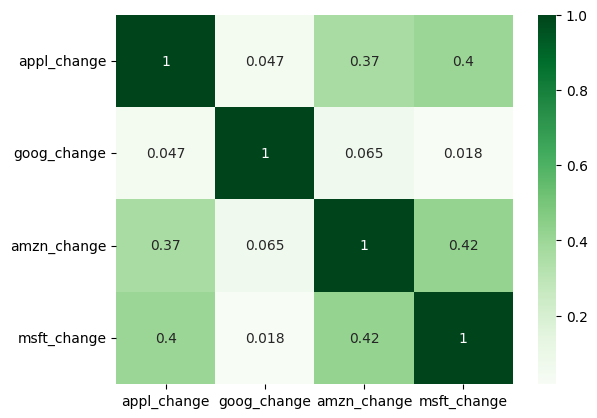

In [33]:
sns.heatmap(ID_Return.corr(),annot=True, cmap='Greens')

## Value at Risk (VAR) analysis for Apple

<Axes: xlabel='appl_change', ylabel='Density'>

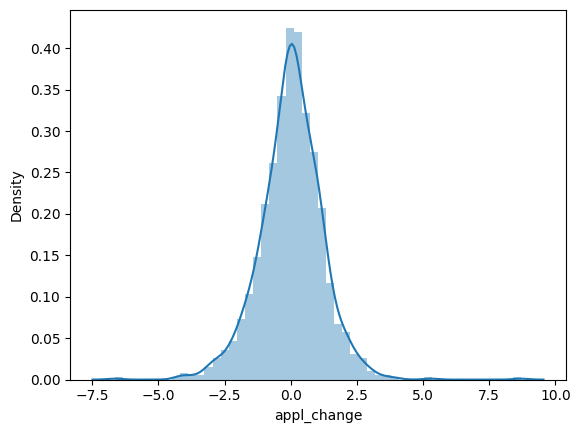

In [34]:
sns.distplot(ID_Return['appl_change'])

In [35]:
ID_Return['appl_change'].std()
# lower the standard deviation less is the VAR 

1.1863057406072945

In [36]:
ID_Return.describe().T
# Least VAR is for microsoft

,count,mean,std,min,25%,50%,75%,max
appl_change,1259.0,0.013851,1.186306,-6.633066,-0.653719,0.042248,0.720582,8.696110
goog_change,975.0,-0.000663,1.084408,-5.617875,-0.548933,0.024957,0.677204,5.200646
amzn_change,1259.0,0.017927,1.350358,-8.561460,-0.732929,-0.002623,0.859899,5.977407
msft_change,1259.0,0.087680,1.059330,-4.922737,-0.506661,0.061106,0.708245,5.109909
